## Analiza danych

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
from matplotlib.pyplot import figure

In [22]:
data = pd.read_csv('data/parsed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             9598 non-null   int64  
 1   length                                 9598 non-null   object 
 2   discount                               9598 non-null   int64  
 3   user_id                                9598 non-null   int64  
 4   successful                             9598 non-null   bool   
 5   mean_price                             9598 non-null   float64
 6   median_of_price                        9598 non-null   float64
 7   min_rating                             9598 non-null   float64
 8   max_rating                             9598 non-null   float64
 9   mean_rating                            9598 non-null   float64
 10  sessions_so_far                        9598 non-null   int64  
 11  succ

In [23]:
num_of_rows = data.shape[0]
successful = data[data.successful == True]
unsuccessful = data[data.successful != True]
num_of_successful = len(successful)
num_of_unsuccessful = len(unsuccessful)

ratio = round(num_of_successful / num_of_unsuccessful, 2)
# stosunek sesji zakończonych zakupem do sesji pustych
ratio

0.3

In [24]:
# procent sesji zakończonych sukcesem
round(num_of_successful / (num_of_successful+num_of_unsuccessful), 2)

0.23

In [25]:
succ_discounts = data.groupby('discount').sum().reset_index('discount')
succ_discounts

,discount,Unnamed: 0,user_id,successful,mean_price,median_of_price,min_rating,max_rating,mean_rating,sessions_so_far,...,cat_Tablety,cat_Tablety_i_akcesoria,cat_Telefony_i_akcesoria,cat_Telefony_komórkowe,cat_Telefony_stacjonarne,cat_Telewizory_i_akcesoria,cat_Video,cat_Zestawy_głośnomówiące,cat_Zestawy_słuchawkowe,gender
0,0,27331519,1142458,1342,3712584.72,3713927.96,10452.6,22993.0,16513.28,187189,...,364,364,3914,803,444,3382,4280,1547,1120,1848
1,5,4774589,200757,193,651216.19,649361.14,1805.4,4073.6,2894.28,31975,...,68,68,630,157,85,621,742,235,153,335
2,10,4608612,195540,231,636250.71,633395.87,1807.5,4018.2,2871.16,31064,...,48,48,675,138,91,619,750,253,193,305
3,15,4907037,204493,242,617422.24,610441.47,1830.0,4141.6,2954.13,31829,...,71,71,687,160,74,619,752,254,199,328
4,20,4434246,190507,213,602859.98,601025.11,1726.2,3971.1,2806.46,31090,...,44,44,700,131,88,645,733,263,218,305


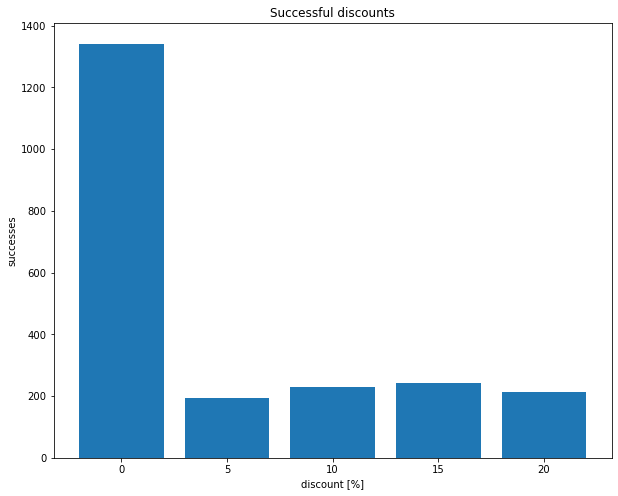

In [27]:
figure(figsize=(10, 8))

x_pos = np.arange(len(succ_discounts['successful']))

plt.bar(x_pos, succ_discounts['successful'])

plt.title('Successful discounts')
plt.xlabel('discount [%]')
plt.ylabel('successes')
 
plt.xticks(x_pos, succ_discounts['discount'])
 
plt.show()

In [28]:
all_discounts = data.groupby('discount').count().reset_index('discount')
all_discounts

,discount,Unnamed: 0,length,user_id,successful,mean_price,median_of_price,min_rating,max_rating,mean_rating,...,cat_Tablety_i_akcesoria,cat_Telefony_i_akcesoria,cat_Telefony_komórkowe,cat_Telefony_stacjonarne,cat_Telewizory_i_akcesoria,cat_Video,cat_Zestawy_głośnomówiące,cat_Zestawy_słuchawkowe,city,gender
0,0,5665,5665,5665,5665,5665,5665,5665,5665,5665,...,5665,5665,5665,5665,5665,5665,5665,5665,5665,5665
1,5,994,994,994,994,994,994,994,994,994,...,994,994,994,994,994,994,994,994,994,994
2,10,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
3,15,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017
4,20,954,954,954,954,954,954,954,954,954,...,954,954,954,954,954,954,954,954,954,954


In [29]:
discounts_effect = succ_discounts[['discount', 'successful']]
discounts_effect['effect'] = discounts_effect['successful'] / all_discounts['successful']
discounts_effect

,discount,successful,effect
0,0,1342,0.236893
1,5,193,0.194165
2,10,231,0.238636
3,15,242,0.237955
4,20,213,0.223270


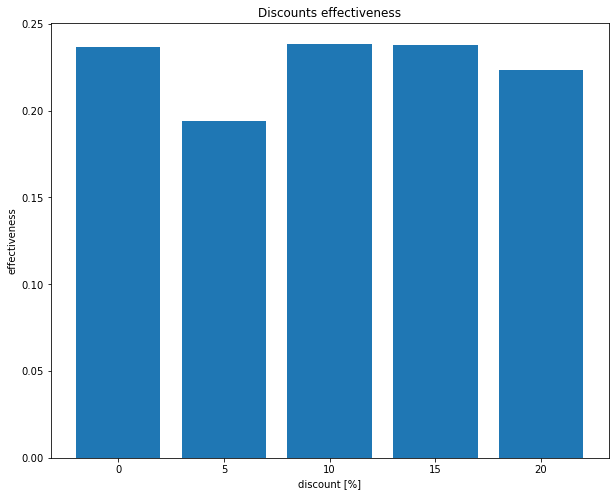

In [32]:
figure(figsize=(10, 8))

x_pos = np.arange(len(discounts_effect['effect']))

plt.bar(x_pos, discounts_effect['effect'])

plt.title('Discounts effectiveness')
plt.xlabel('discount [%]')
plt.ylabel('effectiveness')
 
plt.xticks(x_pos, discounts_effect['discount'])
 
plt.show()

In [33]:
succ_sess_so_far = data.groupby('successful_sessions_so_far')['successful'].sum()
succ_sess_so_far = pd.DataFrame(succ_sess_so_far).reset_index('successful_sessions_so_far')
succ_sess_so_far

,successful_sessions_so_far,successful
0,0,359
1,1,167
2,2,159
3,3,153
4,4,146
5,5,137
6,6,128
7,7,123
8,8,113
9,9,104


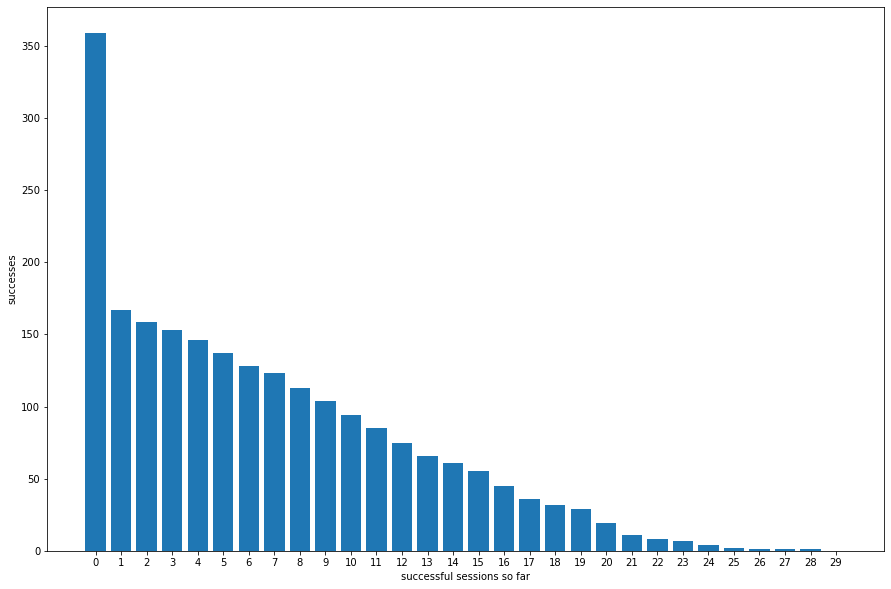

In [34]:
figure(figsize=(15, 10))

x_pos = np.arange(len(succ_sess_so_far['successful']))

plt.bar(x_pos, succ_sess_so_far['successful'])

plt.xlabel('successful sessions so far')
plt.ylabel('successes')
 
plt.xticks(x_pos, succ_sess_so_far['successful_sessions_so_far'])
 
plt.show()

In [35]:
succ_data = data[data['successful'] == True]
gender_succ = succ_data.groupby('gender').sum()
gender_succ['successful']

gender
False    1488
True      733
Name: successful, dtype: int64

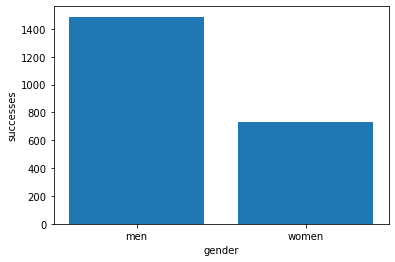

In [42]:
x_pos = np.arange(len(gender_succ.index))

plt.bar(x_pos, gender_succ['successful'])

plt.xlabel('gender')
plt.ylabel('successes')
 
plt.xticks(x_pos, ('men', 'women'))
 
plt.show()

In [46]:
categories = [
    'cat_Akcesoria_telefoniczne',
    'cat_Anteny_RTV',         
    'cat_Audio',                
    'cat_Biurowe_urządzenia_wielofunkcyjne',
    'cat_Drukarki_i_skanery',         
    'cat_Gry_PlayStation3',          
    'cat_Gry_Xbox_360',                     
    'cat_Gry_i_konsole',                   
    'cat_Gry_komputerowe',             
    'cat_Gry_na_konsole',            
    'cat_Komputery',       
    'cat_Monitory',                     
    'cat_Monitory_LCD',                  
    'cat_Odtwarzacze_DVD',               
    'cat_Odtwarzacze_mp3_i_mp4',     
    'cat_Okulary_3D',              
    'cat_Przenośne_audio_i_video',  
    'cat_Sprzęt_RTV',                   
    'cat_Słuchawki',                   
    'cat_Tablety',              
    'cat_Tablety_i_akcesoria',
    'cat_Telefony_i_akcesoria',    
    'cat_Telefony_komórkowe',        
    'cat_Telefony_stacjonarne',         
    'cat_Telewizory_i_akcesoria',    
    'cat_Video',                          
    'cat_Zestawy_głośnomówiące',         
    'cat_Zestawy_słuchawkowe'
]

categories_succ = succ_data[categories].sum().sort_values(ascending=False)
categories_succ.head()

cat_Gry_i_konsole           3406
cat_Sprzęt_RTV              3201
cat_Komputery               3028
cat_Video                   2415
cat_Telefony_i_akcesoria    2197
dtype: int64

In [49]:
women_succ = succ_data[succ_data['gender'] == True]
women_cats = women_succ[categories].sum().sort_values(ascending=False)
women_cats.head()

cat_Sprzęt_RTV                1175
cat_Gry_i_konsole             1127
cat_Komputery                  928
cat_Video                      922
cat_Telewizory_i_akcesoria     785
dtype: int64

In [50]:
men_succ = succ_data[succ_data['gender'] == False]
men_cats = men_succ[categories].sum().sort_values(ascending=False)
men_cats.head()

cat_Gry_i_konsole           2279
cat_Komputery               2100
cat_Sprzęt_RTV              2026
cat_Video                   1493
cat_Telefony_i_akcesoria    1477
dtype: int64

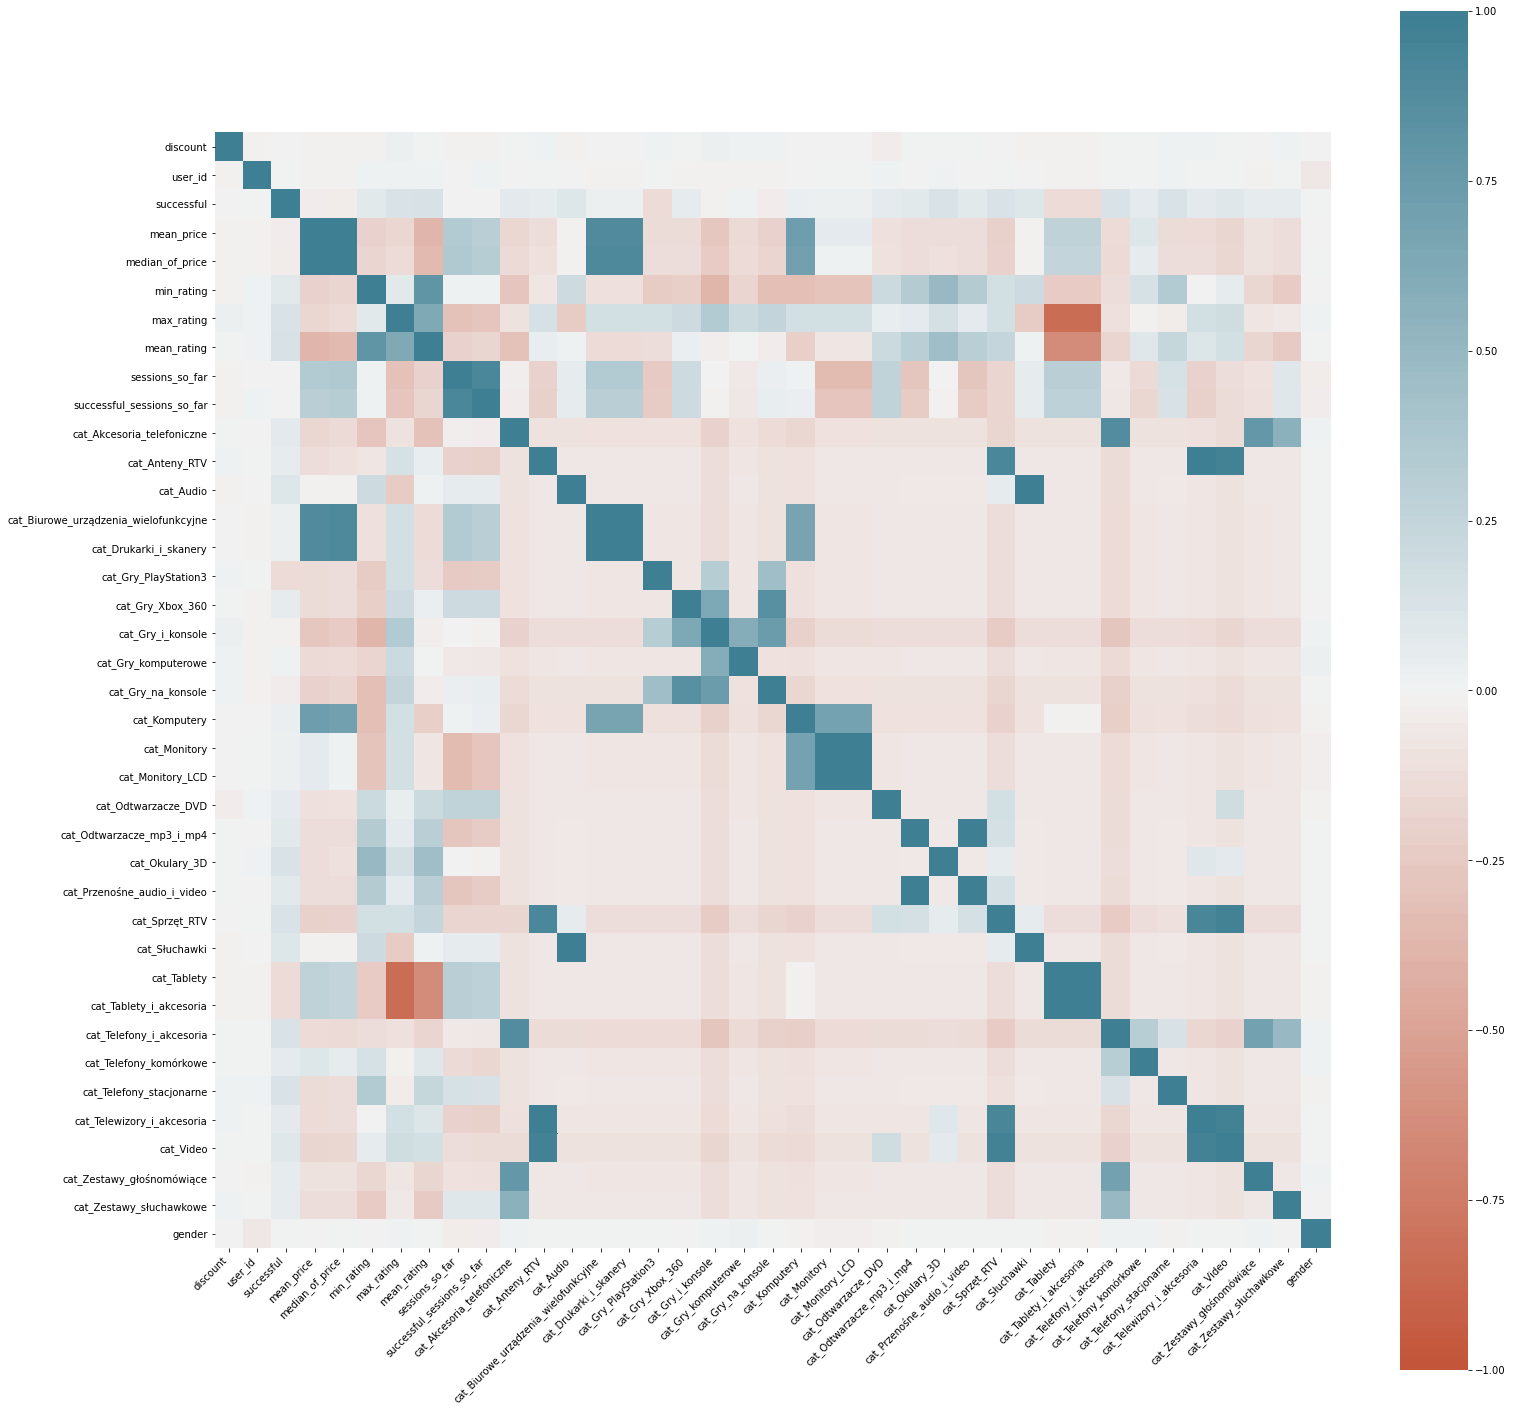

In [57]:
import seaborn as sns

figure(figsize=(25, 25))

corr = data.iloc[:, 1:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);